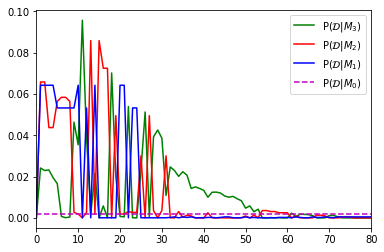

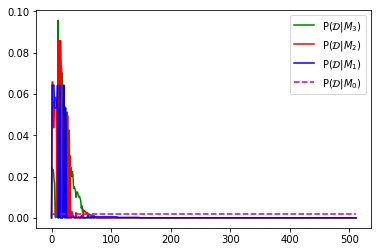

In [97]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from math import exp, sqrt, pi
from scipy.stats import multivariate_normal
from scipy.spatial import distance_matrix

# Generate D and visualise

def generate_D():
    product = list(it.product([-1, 1], repeat=9))
    D = []
    for d in product:
        D.append(np.reshape(np.asarray(d),(3,3)))
    return D

beg = r'\begin{tabular}{ c c c}'
circ = r'\tikz\draw[red,fill=red] (0,0) circle (.5ex); &'
cros = r'\tikz\draw (0,0) node[cross=0.5ex] {}; &'
dash = r'\\'
end = r'\end{tabular}'

def draw_D(data):
    print(beg)
    for i in range(3):
        for j in range(3):
            if data[i][j] == -1:
                print(circ,end=" ")
            else:
                print(cros,end=" ")
        print(dash)
    print(end)

# Represent each model

#def M0 -- inline in marginalise function

def M1(data, params):
    p = 1.0
    for i in range(3):
        for j in range(3):
            e = np.exp(-data[i,j]*params[0]*(i-1))
            p = p * 1/(1+e)
    return p
            
def M2(data, params):
    p = 1.
    for i in range(3):
        for j in range(3):
            e = np.exp(-data[i,j]*(params[0]*(i-1) + params[1]*(j-1)))
            p = p * 1/(1+e)
    return p
            
def M3(data, params):
    p = 1.
    for i in range(3):
        for j in range(3):
            e = np.exp(-data[i,j]*(params[0]*(i-1) + params[1]*(j-1)+params[2]))
            p = p * 1/(1+e)
    return p

# Sample from the prior

samples = 100

cov1 = (10**3)*np.eye(1)
mean1 = np.zeros(1)
params1 = np.random.multivariate_normal(mean1, cov1, samples)

cov2 = (10**3)*np.eye(2)
mean2 = np.zeros(2)
params2 = np.random.multivariate_normal(mean2, cov2, samples)

cov3 = (10**3)*np.eye(3)
mean3 = np.zeros(3)
params3 = np.random.multivariate_normal(mean3, cov3, samples)

# Monte Carlo integration

def marginalise(data, model, params):
    p=0.0
    for i in range(samples):
        if model == 0:
            p = p + (1.0/512)
        if model == 1:
            p = p + M1(data, params[i])
        if model == 2:
            p = p + M2(data, params[i])
        if model == 3:
            p = p + M3(data, params[i])
    return p/samples

# Order data sets

def order_data_sets(data):
    # Create distance matrix
    size = data.shape[0]
    distance = np.zeros([size, size])
    for i in range(size):
        for j in range(size):
            distance[i,j] = data[i]-data[j]
            if i==j:
                distance[i,j] = np.inf

    L = [];
    D = range(data.shape[0])
    
    # Chose start of data set L as argmin
    LL = data.argmin()
    
    D.remove(LL)
    L.append(LL)
    
    while len(D) != 0:
        N = []
        
        # Find set of points in D with L as nearest neighbour
        for k in range(len(D)):
            # Get the nearest neighbour to D[k]
            n = distance[D[k], D].argmin()
            if D[n] == LL:
                N.append(D[ind])
        if not N:
            # Choose nearest neighbour in D to L
            LL = D[distance[LL,D].argmin()]
        else:
            # Choose furthest point from L in N
            LL = N[distance[LL,N].argmin()]
        D.remove(LL)
        L.append(LL)
    return L

data = np.zeros([4,512])
d = generateDataset()

for j in range(512):
    data[0][j]=marginalise(d[j], 0, None)
    data[1][j]=marginalise(d[j], 1, params1)
    data[2][j]=marginalise(d[j], 2, params2)
    data[3][j]=marginalise(d[j], 3, params3)
    
index = order_data_sets(np.sum(data, axis=0))
plt.plot(data[3, index], 'g', label= "P($\mathcal{D}|{M}_3$)")
plt.plot(data[2, index], 'r', label= "P($\mathcal{D}|{M}_2$)")
plt.plot(data[1, index], 'b', label= "P($\mathcal{D}|{M}_1$)")
plt.plot(data[0, index], 'm--', label = "P($\mathcal{D}|{M}_0$)")
plt.xlim(0, 80)
plt.legend()
plt.show()
plt.plot(data[3, index], 'g', label= "P($\mathcal{D}|{M}_3$)")
plt.plot(data[2, index], 'r', label= "P($\mathcal{D}|{M}_2$)")
plt.plot(data[1, index], 'b', label= "P($\mathcal{D}|{M}_1$)")
plt.plot(data[0, index], 'm--', label = "P($\mathcal{D}|{M}_0$)")
plt.legend()
plt.show()